In [72]:
import os
import string
import json
import datetime
import pandas as pd

def load_channel(filename, folder):
    channel_messages = []
    with open(''.join([folder, '/', filename]), 'r') as f:
        channel_messages = f.read().split(';;;\n;;;')
    f.close()
    channel_messages = [eval(msg)for msg in channel_messages]
    return channel_messages

## Daten

- Textdateien nach Muster 'CHANNELID_CHANNELNAME.txt'
- Channelname kann vom Channel-Host geändert werden (entspricht mögl. nicht mehr aktuellem), ID nicht
- keine Sonder- und Leerzeichen im Channelnamen

### Struktur eines "Channels"

- Inhalt einer Textdatei entspricht (nicht serialisiertem) JSON einer Telegram API-Abfrage in Form von telethon Message Objekt
- Eingelesen als Liste von dictionaries via load_channel()
- Jeder dictionary entspricht dem Inhalt eines telethon Message-Objekts plus Eintrag für Kanalnamen


In [20]:
# Liste an Channels / Textdateien
text_files = [tf for tf in os.listdir('backup_january') if tf.endswith('txt')]

In [22]:
# sortieren nach Dateigröße, groß zu klein
text_files.sort(key=lambda x: os.stat(''.join(['backup_january/', x])).st_size, reverse=True)

In [23]:
text_files

['1082084045_Караульный.txt',
 '1403724914_FriedensforschungLockdownDailyMiracle.txt',
 '1113491634_BellumActaArchiveChannel.txt',
 '1356989653_GehlkenRonaldKanal.txt',
 '1139641996_TheIndependent.txt',
 '1148918560_Бородавещает.txt',
 '1196016597_SystemNeustart.txt',
 '1422252982_WIMMedienkritikfürstaatlicheTransparenz.txt',
 '1246399946_СИЛОВИКИ.txt',
 '1206731745_CodiKAG.txt',
 '1389360159_Запискиизкрасногодома.txt',
 '1427805549_URGENTNEWSVOLTWOQ.txt',
 '1218998207_OliverJanichöffentlich.txt',
 '1284455740_XavierNaidoooffiziell.txt',
 '1188770211_Brittscheöffentlich.txt',
 '1454453137_THEWAKEUPCHANNEL.txt',
 '1160758840_Breitbart.txt',
 '1121698336_НеСоциальнаяСетьТроБарбаросса.txt',
 '1315085027_Wirschaffendas.txt',
 '1071050393_SüddeutscheZeitung.txt',
 '1236806841_RalphBernhardKutza.txt',
 '1171052910_WernerAltnickelInfo.txt',
 '1177171390_GerhardWisnewskiOFFIZIELL.txt',
 '1207916306_AufgewachtmitBirgitDoll.txt',
 '1068572846_TVGRAM.txt',
 '1232319974_FreierWille.txt',
 '1351652

In [32]:
# Channel als Liste von Dictionaries, die einem Post entsprechen
channel_messages = load_channel('1444228991_ATTILAHILDMANNOFFICIAL.txt')

In [41]:
# Welche Informationen gibt?
channel_messages[0].keys()

dict_keys(['post', 'reply_to_msg_id', 'post_author', 'from_id', 'media', 'message', 'edit_date', 'grouped_id', 'legacy', 'restriction_reason', 'out', 'date', 'fwd_from', 'silent', 'reply_markup', 'mentioned', 'media_unread', 'views', 'entities', 'edit_hide', 'to_id', 'via_bot_id', '_', 'id', 'from_scheduled'])

Die Art der verfügbaren Informationen variiert je Message. Datum, Textinhalt (kann auch '' sein), Kanalname, Message ID ist aber immer enthalten. Medien sind nicht immer enthalten.

### Relevante Daten

* id integer
* channel_id
* channel_name
* message string
* date Date
* edit_date Date
* from_id integer, leer
* post_author string
* to_id dict, welcher Adressat?
    * enthält meistens channel_id integer sowie _ für den Typen (PeerChannel)
* fwd_from dict
    * enthält channel_id integer, post_author, from_name, from_id
    * channel_id wenn forward von channel, from_id wenn forward von Peer

### Relevante Medientypen

* document: können selbst hochgeladene Bilder und Videos sein
    * media -> document -> mime_type, duration(for video), date datetime
* webpage: links zu Webseiten oder aber 
    * media -> webpage -> type, url, site_name, date datetime
* poll: Umfrage
    * media -> results, poll
    * in results gibt es eine Liste mit option, string valued, sowie voters, integer valued
    * in poll gibt es multiple_choice boolean, question string und als weitere dict list answers
    * in answers gibt es wieder eine Liste wo jeder Eintrag option hat (korrespondierend) sowie ein Feld text

In [39]:
channel_messages[0]

{'post': True,
 'reply_to_msg_id': None,
 'post_author': None,
 'from_id': None,
 'media': {'ttl_seconds': None,
  'photo': {'sizes': [{'bytes': b'\x01\x19(\xcb\x19\xcejhTK V\xce;\xe2\x8d\x92m\xe5)\xb6\xf2\x84\x95K\x0f\x97\xbdm\'d%\xb8\xb2|\x8e\xc89\x03\xa5F2\xbd\xa9\xf2\xc8\x0c\xc4\x81\x81R4R\xb0\xfb\x9f\xad8\xc94\'\xa3+\x9c\x9eqEN"\x95F6QL\x0b\xb2.\xf8\xca\xfa\xd5)-_\xcd\xdb\x1a\x1c`f\xb4\x05\x10\xff\x00\xae\x93\xea?\x95*\x892b\xec\x8aQ\xd8\xb9-\xe6)\xe4q\x8e\xb5b\x14\x96\x14\xd8\xc0\xb0\x1d;\x1a\xbf\xda\xa2\x92\xa6)\\m\x91\x9a(4V\xc4\x1f',
     'type': 'i',
     '_': 'PhotoStrippedSize'},
    {'size': 14846,
     'w': 320,
     'type': 'm',
     '_': 'PhotoSize',
     'location': {'volume_id': 200123300640,
      '_': 'FileLocationToBeDeprecated',
      'local_id': 34512},
     'h': 200},
    {'size': 18596,
     'w': 460,
     'type': 'x',
     '_': 'PhotoSize',
     'location': {'volume_id': 200123300640,
      '_': 'FileLocationToBeDeprecated',
      'local_id': 34513},
     'h':

## Beispielhafter Blick in die Daten

#### Anzahl Messages mit Text

In [64]:
channel_dates = [msg['date'] for msg in channel_messages if ('date' in msg.keys()) and ('message' in msg.keys()) and msg['message']]

In [65]:
channel_texts = [msg['message'] for msg in channel_messages if ('date' in msg.keys()) and ('message' in msg.keys()) and msg['message']]

In [81]:
msg_dates = pd.DataFrame(data={
    'messages':channel_texts,
    'dates':channel_dates
}).sort_values(by='dates').reset_index(drop=True)

In [82]:
msg_dates

,messages,dates
0,Dann schreiben wir mal Geschichte!,2020-04-28 06:22:29+00:00
1,Dann schreiben wir mal Geschichte!,2020-04-28 06:22:29+00:00
2,⚔️🙏,2020-04-28 06:30:36+00:00
3,⚔️🙏,2020-04-28 06:30:36+00:00
4,Das Video sollte jeder von euch schauen und ve...,2020-04-28 06:43:27+00:00
...,...,...
43946,Immer mehr Flugblätter werden erstellt und ver...,2021-01-22 18:14:44+00:00
43947,"💥‼️\n""Mit"" oder ""an"" Corona, ...das kann sein....",2021-01-22 18:14:56+00:00
43948,https://www.faz.net/aktuell/politik/ausland/lo...,2021-01-22 18:15:44+00:00
43949,In Polen machen die Geschäfte wieder auf. Die ...,2021-01-22 18:15:57+00:00


<AxesSubplot:xlabel='yearmonthday'>

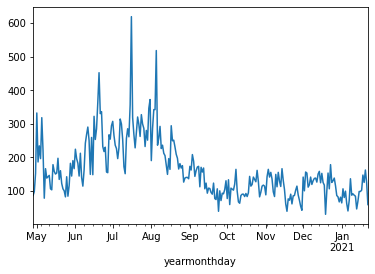

In [101]:
msg_dates['yearmonthday'] = msg_dates.dates.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
msg_dates.groupby('yearmonthday').dates.agg('count').plot()

#### Anzahl Messages mit Medien

In [103]:
channel_dates = [msg['date'] for msg in channel_messages if ('date' in msg.keys()) and ('media' in msg.keys())]

In [107]:
media_dates = pd.DataFrame(data={
    'dates':channel_dates
})

<AxesSubplot:xlabel='yearmonthday'>

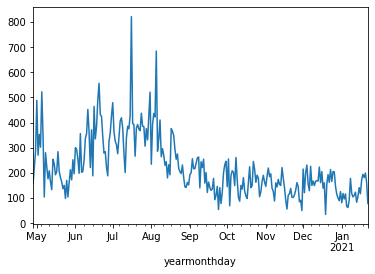

In [108]:
media_dates['yearmonthday'] = media_dates.dates.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
media_dates.groupby('yearmonthday').dates.agg('count').plot()